- gender 성별
- age 나이
- height 키
- weight 몸무게
- eyesight(left, right) 왼쪽 시력, 오른쪽 시력
- hearing(left, right) 왼쪽 청력, 오른쪽 청력

- systolic 최고혈압(대동맥 내로 보내지는 심실 수축기의 혈압)
- relaxation 최저혈압
- fasting blood sugar 공복혈당
- Cholesterol 총 콜레스테롤
- triglyceride 중성지방
- HDL 고밀도지단백 (콜레스테롤)
- LDL 저밀도지단백 (콜레스테롤)
- hemoglobin 헤모글로빈 수치
- Urine protein 단백뇨
- serum creatinine 혈액 또는 소변에서 크레아티닌 양 측정 - *신장*관련

- AST 아스파르테이트 아미노 전달효소 *간*
- ALT 알라닌 아미노 전달효소 *간* 
    - AST, ALT의 정상 범위 ~40, 경도 40~ 200, 중등도 200~400, 중증 400~
- Gtp 감마 Gtp간 기능 검사 *알코올 관련*
    - 정상 ~50, 가벼운 증가 51~100, 중간정도의 증가 101~200, 고도의 증가 201~500, 초고도 증가 500~
    - 술 마시지 않는 사람도 높게 나올 수 있다.
    
- oral 구강검사 여부
- dental caries 충치 갯수
- tartar 치석존재여부

In [1]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [3]:
df = pd.read_csv('C:/ds_work/ML_DATA/smoking.csv')
df.shape  # (55693, 27)

(55692, 27)

In [4]:
# 범주형 데이터 변환
df = df.replace({'N':0,'Y':1,'F':0,'M':1, })
gender = {'F': 0, 'M': 1}
oral = {'N': 0, 'T': 1}
tartar = {'N': 0, 'T': 1}
# df 전체 float형으로 바꾸기
df = df.astype(float)

In [5]:
target = df.loc[:, 'smoking']
target

0        0.0
1        0.0
2        1.0
3        0.0
4        0.0
        ... 
55687    0.0
55688    0.0
55689    0.0
55690    0.0
55691    1.0
Name: smoking, Length: 55692, dtype: float64

In [8]:
### 간 데이터프레임 ###

df_li = df.iloc[:, 20:23]
#df_li

liver=pd.concat([df_li,target], axis=1)
liver

,AST,ALT,Gtp,smoking
0,18.0,19.0,27.0,0.0
1,22.0,19.0,18.0,0.0
2,21.0,16.0,22.0,1.0
3,19.0,26.0,18.0,0.0
4,16.0,14.0,22.0,0.0
...,...,...,...,...
55687,14.0,7.0,10.0,0.0
55688,20.0,12.0,14.0,0.0
55689,17.0,11.0,12.0,0.0
55690,20.0,19.0,18.0,0.0


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
train_test_split(liver.iloc[:,:-1],liver.iloc[:,-1], test_size=0.2, random_state=42)

### 3. 훈련01 : 전체 모델 구현으로 정확도 확인

#### DecisionTreeClassifier

DecisionTreeClassifier()

0.7003321662626807

confusion_matrix : 
 [[5752 1275]
 [2063 2049]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

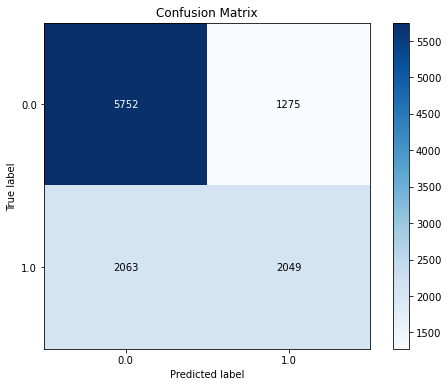

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier()
model.fit(X_train,y_train)

pred = model.predict(X_test)
acc = accuracy_score(y_test,pred)
acc

from sklearn.metrics import confusion_matrix
import scikitplot as skplt

pred = model.predict(X_test)
# 실제 , 예측
cm = confusion_matrix(y_test, pred)
print('confusion_matrix : \n', cm)

skplt.metrics.plot_confusion_matrix(y_test,pred,figsize=(8,6))
plt.show()

#### RandomForestClassifier

RandomForestClassifier()

0.7095789568183859

confusion_matrix : 
 [[5647 1380]
 [1855 2257]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

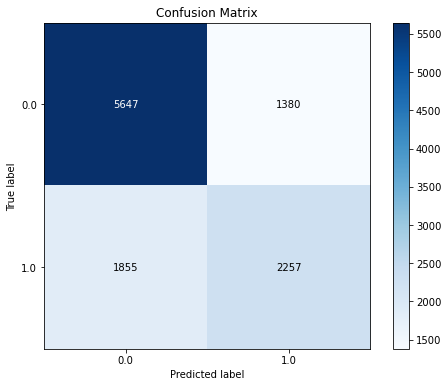

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier()
model.fit(X_train,y_train)

pred = model.predict(X_test)
acc = accuracy_score(y_test,pred)
acc

from sklearn.metrics import confusion_matrix
import scikitplot as skplt

pred = model.predict(X_test)
# 실제 , 예측
cm = confusion_matrix(y_test, pred)
print('confusion_matrix : \n', cm)

skplt.metrics.plot_confusion_matrix(y_test,pred,figsize=(8,6))
plt.show()

### XGBoost

[0]	validation_0-logloss:0.64137
[1]	validation_0-logloss:0.61444
[2]	validation_0-logloss:0.59967
[3]	validation_0-logloss:0.59146
[4]	validation_0-logloss:0.58667
[5]	validation_0-logloss:0.58406
[6]	validation_0-logloss:0.58265
[7]	validation_0-logloss:0.58204
[8]	validation_0-logloss:0.58166
[9]	validation_0-logloss:0.58143
[10]	validation_0-logloss:0.58133
[11]	validation_0-logloss:0.58130
[12]	validation_0-logloss:0.58122
[13]	validation_0-logloss:0.58123
[14]	validation_0-logloss:0.58119
[15]	validation_0-logloss:0.58118
[16]	validation_0-logloss:0.58093
[17]	validation_0-logloss:0.58101
[18]	validation_0-logloss:0.58081
[19]	validation_0-logloss:0.58086
[20]	validation_0-logloss:0.58090
[21]	validation_0-logloss:0.58087
[22]	validation_0-logloss:0.58091
[23]	validation_0-logloss:0.58085
[24]	validation_0-logloss:0.58084
[25]	validation_0-logloss:0.58073
[26]	validation_0-logloss:0.58074
[27]	validation_0-logloss:0.58068
[28]	validation_0-logloss:0.58042
[29]	validation_0-loglos

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=10, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

0.6866864170930963

confusion_matrix : 
 [[5739 1288]
 [2202 1910]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

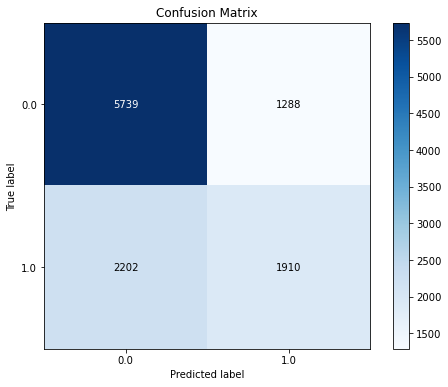

In [29]:
import xgboost as xgb
import pandas as pd
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

model = xgb.XGBClassifier(early_stopping_rounds=10)
eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, eval_set=eval_set)#, verbose=True

pred = model.predict(X_test)
acc = accuracy_score(y_test,pred)
acc

from sklearn.metrics import confusion_matrix
import scikitplot as skplt

pred = model.predict(X_test)
# 실제 , 예측
cm = confusion_matrix(y_test, pred)
print('confusion_matrix : \n', cm)

skplt.metrics.plot_confusion_matrix(y_test,pred,figsize=(8,6))
plt.show()

In [30]:
# best_iteration
print(model.best_iteration)
print(model.best_score)

from sklearn import metrics
y_pred = model.predict_proba(X_test)
metrics.log_loss(y_test, y_pred)

# feature_importances_
#import matplotlib.pyplot as plt 
#model.feature_importances_
#plt.barh(df.iloc[:,:-1].columns, model.feature_importances_)

33
0.5801704771299943


0.5801704792629478

### LGBMClassifier

[1]	valid_0's binary_logloss: 0.644913
Training until validation scores don't improve for 10 rounds
[2]	valid_0's binary_logloss: 0.633826
[3]	valid_0's binary_logloss: 0.624773
[4]	valid_0's binary_logloss: 0.617308
[5]	valid_0's binary_logloss: 0.611228
[6]	valid_0's binary_logloss: 0.606232
[7]	valid_0's binary_logloss: 0.602132
[8]	valid_0's binary_logloss: 0.598714
[9]	valid_0's binary_logloss: 0.595801
[10]	valid_0's binary_logloss: 0.593503
[11]	valid_0's binary_logloss: 0.591989
[12]	valid_0's binary_logloss: 0.590457
[13]	valid_0's binary_logloss: 0.58889
[14]	valid_0's binary_logloss: 0.587697
[15]	valid_0's binary_logloss: 0.586661
[16]	valid_0's binary_logloss: 0.586013
[17]	valid_0's binary_logloss: 0.585389
[18]	valid_0's binary_logloss: 0.584906
[19]	valid_0's binary_logloss: 0.584529
[20]	valid_0's binary_logloss: 0.584296
[21]	valid_0's binary_logloss: 0.583995
[22]	valid_0's binary_logloss: 0.583711
[23]	valid_0's binary_logloss: 0.58359
[24]	valid_0's binary_logloss:

LGBMClassifier(boosting_type='goss', max_depth=5, random_state=0)

0.6831852051351108

confusion_matrix : 
 [[5768 1259]
 [2270 1842]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

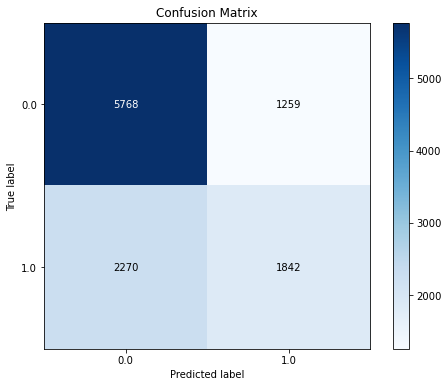

In [31]:
import lightgbm as lgb # 분류 회귀 다 됨
model = lgb.LGBMClassifier(boosting_type='goss',max_depth=5, random_state=0)
eval_set = [(X_test, y_test)]
callbacks = []  # 리스트 객체 사용자함수를 담을 곳
callbacks.append(lgb.early_stopping(stopping_rounds=10)) # 부스팅 반복 횟수 제어
callbacks.append(lgb.log_evaluation())
model.fit(X_train, y_train, eval_set=eval_set, callbacks=callbacks)

pred = model.predict(X_test)
acc = accuracy_score(y_test,pred)
acc

from sklearn.metrics import confusion_matrix
import scikitplot as skplt

pred = model.predict(X_test)
# 실제 , 예측
cm = confusion_matrix(y_test, pred)
print('confusion_matrix : \n', cm)

skplt.metrics.plot_confusion_matrix(y_test,pred,figsize=(8,6))
plt.show()

In [32]:
print(model.best_iteration_)
print(model.best_score_)

40
defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('binary_logloss', 0.5826276601015187)])})


In [33]:
from sklearn import metrics
y_pred = model.predict_proba(X_test)
metrics.log_loss(y_test, y_pred)

0.5826276601015187

<AxesSubplot:title={'center':'Metric during training'}, xlabel='Iterations', ylabel='binary_logloss'>

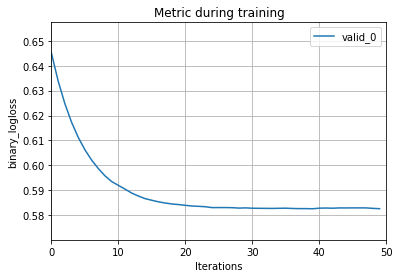

In [34]:
lgb.plot_metric(model)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

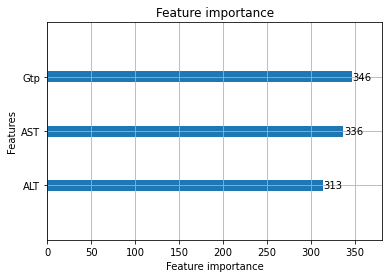

In [35]:
lgb.plot_importance(model)

### Logistic Regression

LogisticRegression(max_iter=10000)

0.6661280186731304

0.6661280186731304

confusion_matrix : 
 [[5768 1259]
 [2270 1842]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

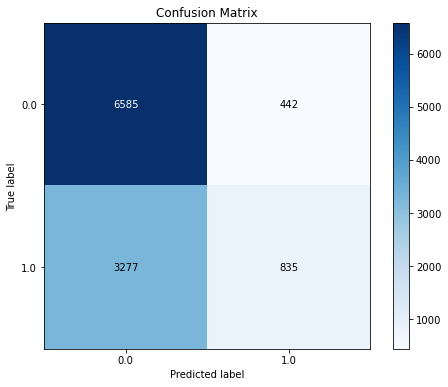

In [37]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression(max_iter = 10000)

model2.fit(X_train,y_train)

model2.score(X_test,y_test)
pred_2 = model2.predict(X_test)
acc2 = accuracy_score(y_test,pred_2)
acc2

# 실제 , 예측
cm_2 = confusion_matrix(y_test, pred)
print('confusion_matrix : \n', cm_2)

skplt.metrics.plot_confusion_matrix(y_test,pred_2,figsize=(8,6))
plt.show()

### Support Vector Machine

SVC()

0.6823772331448066

confusion_matrix : 
 [[6101  926]
 [2612 1500]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

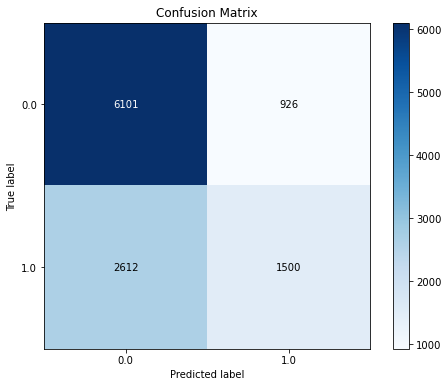

In [38]:
### 모델 - svm ###

from sklearn import svm
from sklearn.metrics import accuracy_score


model = svm.SVC()
model.fit(X_train, y_train)
pred = model.predict(X_test)
acc = accuracy_score(y_test, pred) 
acc 

from sklearn.metrics import confusion_matrix 
import scikitplot as skplt 
pred = model.predict(X_test) # 실제 , 예측 
cm = confusion_matrix(y_test, pred) 
print('confusion_matrix : \n', cm) 
skplt.metrics.plot_confusion_matrix(y_test,pred,figsize=(8,6)) 
plt.show()